<a href="https://colab.research.google.com/github/AntonioFialhoSN/atv2-/blob/main/atv2_python_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#atv2_python_regression
##Functions
------------------------------------------------------
###compute_cost.py

In [1]:
"""
@file compute_cost.py
@brief Computes the cost for linear regression.
"""

import numpy as np

def compute_cost(X, y, theta):
    """
    Compute the cost for linear regression.

    This function calculates the mean squared error cost function J(θ) for linear regression:
    J(θ) = (1 / (2 * m)) * Σ (h(θ) - y)^2

    where:
    - J(θ) is the cost
    - m is the number of training examples
    - h(θ) is the hypothesis function (X @ theta)
    - y is the vector of observed values

    @param X: np.ndarray
        Feature matrix including the intercept term (shape: m x n).
    @param y: np.ndarray
        Target variable vector (shape: m,).
    @param theta: np.ndarray
        Parameter vector for linear regression (shape: n,).

    @return: float
        The computed cost value as a single float.
    """
    # get the number of training examples
    m = len(y)

    # Compute the predictions using the linear model
    h_o = X @ theta  # ou np.dot(X, theta)

    # Compute the error vector
    errors = h_o - y

    # Compute the cost as the mean squared error
    J_o = (1/(2*m)) * np.sum(errors**2)

    return J_o

###gradient_descent.py

In [2]:
"""
@file gradient_descent.py
@brief Implementa o algoritmo de descida do gradiente para regressão linear.
"""

import numpy as np


def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Executa a descida do gradiente para minimizar a função de custo J(θ)
    no contexto de regressão linear.

    A cada iteração, os parâmetros theta são atualizados com base
    no gradiente da função de custo em relação aos parâmetros atuais.

    @param X: np.ndarray
        Matriz de entrada (m amostras × n atributos), incluindo termo de bias.
    @param y: np.ndarray
        Vetor de saída esperado com dimensão (m,).
    @param theta: np.ndarray
        Vetor de parâmetros inicial (n,).
    @param alpha: float
        Taxa de aprendizado (learning rate).
    @param num_iters: int
        Número de iterações da descida do gradiente.

    @return: tuple[np.ndarray, np.ndarray]
        theta: vetor otimizado de parâmetros (n,).
        J_history: vetor com o histórico do valor da função de custo em cada iteração (num_iters,).
        theta_history: parâmetros em cada iteração (num_iters+1, n).
    """
    # Obtem o número de amostras
    m = len(y)
    # Inicializa o vetor de custo J_history para armazenar o custo em cada iteração com zeros
    # O vetor J_history tem o mesmo tamanho que o número de iterações
    J_history = np.zeros(num_iters)

    # Inicializa o vetor theta_history para armazenar os parâmetros em cada iteração
    # O vetor theta_history tem o tamanho (num_iters + 1, n)
    # O vetor theta_history é inicializado com zeros
    # num_iters é o número de iterações
    # O +1 é para armazenar os parâmetros iniciais antes de começar as iterações
    # n é o número de parâmetros (atributos) no vetor theta
    # Em resumo, theta_history é uma matriz onde cada linha representa os parâmetros em uma iteração
    # e a primeira linha (índice 0) contém os parâmetros theta iniciais
    theta_history = np.zeros((num_iters + 1, len(theta)))

    # Armazena os parâmetros iniciais no vetor theta_history
    # Isso é útil para visualizar como os parâmetros evoluem ao longo das iterações
    # e como eles convergem para os valores ótimos
    # theta_history é uma matriz onde cada linha representa os parâmetros em uma iteração
    # A primeira linha (índice 0) contém os parâmetros theta iniciais
    # Isso permite acompanhar a evolução dos parâmetros ao longo do processo de otimização
    # As demais linhas serão preenchidas com os parâmetros atualizados em cada iteração
    theta_history[0] = theta

    for i in range(num_iters):
        # Calcula as previsões (hipótese) com base nos parâmetros atuais
        # A hipótese (predições) é calculada como o produto escalar entre a matriz de entrada X e o vetor de parâmetros theta
        predictions = X @ theta

        # Calcula o erro entre as previsões e os valores reais
        # O erro é a diferença entre as previsões e os valores reais
        # Isso fornece uma medida de quão longe as previsões estão dos valores reais
        # O erro é usado para calcular o gradiente da função de custo
        erro = predictions - y

        # Calcula o gradiente da função de custo em relação a theta
        # O gradiente é calculado como a média do erro multiplicado pela matriz de entrada X
        # Isso fornece uma medida de quão sensível é a função de custo em relação a cada parâmetro
        # O gradiente é um vetor que aponta na direção de maior aumento da função de custo
        # Portanto, para minimizar a função de custo, os parâmetros devem ser ajustados na direção oposta ao gradiente
        gradient = (1/m) * (X.T @ erro)

        # Atualiza os parâmetros theta
        # O novo valor de theta é obtido subtraindo o produto da taxa de aprendizado
        # pelo gradiente da função de custo em relação a theta
        # Isso ajusta os parâmetros na direção oposta ao gradiente, minimizando a função de custo
        theta = theta - alpha * gradient

        # Armazena o custo da iteração atual para análise
        J_history[i] = compute_cost(X, y, theta)

        # Armazena os parâmetros theta da iteração atual para análise
        # Isso permite visualizar como os parâmetros evoluem ao longo das iterações
        # Isso pode ser útil para entender o comportamento do algoritmo de descida do gradiente
        # e como os parâmetros convergem para os valores ótimos
        theta_history[i + 1] = theta

    return theta, J_history, theta_history

###plot_data.py

In [3]:
"""
@file plot_data.py
@brief Plots the data points.
"""

import matplotlib.pyplot as plt

def plot_data(x, y):
    """
    @brief Plot training data as red crosses.

    @param x np.ndarray Independent variable (population)
    @param y np.ndarray Dependent variable (profit)
    """
    plt.figure()
    plt.plot(x, y, 'rx', markersize=5)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Training Data')
    plt.grid(True)
    plt.show()

###warm_up_exercise.py

In [4]:
"""
@file warm_up_exercise.py
@brief Returns a 5x5 identity matrix.
"""

import numpy as np

def warm_up_exercise1():
    """
    @brief Create and return a 5x5 identity matrix.

    @return np.ndarray Identity matrix (5x5)
    """
    return np.eye(5)

def warm_up_exercise2(m=5):
    """
    @brief Cria um vetor coluna de 1s, utilizado como termo de bias (intercepto) em regressão linear.

    @param m: int
        Número de exemplos (linhas).

    @return np.ndarray
        Vetor de shape (m, 1) com todos os valores iguais a 1.
    """
    return np.ones((m, 1))

def warm_up_exercise3(x):
    """
    @brief Adiciona uma coluna de 1s (bias) ao vetor de entrada x.

    @param x: np.ndarray
        Vetor unidimensional de shape (m,)

    @return np.ndarray
        Matriz de shape (m, 2), com a primeira coluna sendo 1s (bias) e a segunda os valores de x.
    """
    # obtem o número de exemplos
    m = x.shape[0]
    # Garante que x é um vetor coluna usando reshape. Use np.reshape
    x = x.reshape(m, 1)
    # Adiciona uma coluna de 1s (bias) ao vetor x. Use np.ones para criar um vetor de 1s
    bias = np.ones((m, 1))
    # Concatena a coluna de 1s (bias) com o vetor x. Use np.hstack para concatenar horizontalmente e retorne
    return np.hstack((bias, x))

def warm_up_exercise4(X, theta):
    """
    @brief Realiza a multiplicação matricial entre X e θ, simulando h(θ) = X @ θ.

    @param X: np.ndarray
        Matriz de entrada de shape (m, n)

    @param theta: np.ndarray
        Vetor de parâmetros de shape (n,)

    @return np.ndarray
        Vetor de predições (m,)
    """
    # retorna o resultado da multiplicação matricial entre X e θ
    return X @ theta

def warm_up_exercise5(predictions, y):
    """
    @brief Calcula o vetor de erros quadráticos (squared errors) entre as predições e os valores reais.

    @param predictions: np.ndarray
        Vetor de predições (m,)

    @param y: np.ndarray
        Vetor de valores reais (m,)

    @return np.ndarray
        Vetor com os erros quadráticos: (pred - y)^2
    """
    # Calcula o vetor de erros quadráticos (squared errors) entre as predições e os valores reais
    # O vetor de erros quadráticos é calculado como a diferença entre as predições e os valores reais
    return (predictions - y) ** 2

def warm_up_exercise6(errors):
    """
    @brief Calcula o custo médio (mean cost) a partir dos erros quadráticos.

    @param errors: np.ndarray
        Vetor de erros quadráticos (m,)

    @return float
        Custo médio (mean cost)
    """
    # O custo médio é calculado como a média dos erros quadráticos
    # Obtenha usando np.mean e não esqueça de dividir por 2
    return np.mean(errors) / 2

def warm_up_exercise7(X, y, theta):
    """
    @brief Calcula o custo médio (mean cost) para um modelo de regressão linear.

    @param X: np.ndarray
        Matriz de entrada de shape (m, n)

    @param y: np.ndarray
        Vetor de valores reais (m,)

    @param theta: np.ndarray
        Vetor de parâmetros de shape (n,)

    @return float
        Custo médio (mean cost)
    """
    # Use as funções auxiliares para calcular o custo médio
    # 1. Calcule as predições usando a função warm_up_exercise4
    # 2. Calcule os erros quadráticos usando a função warm_up_exercise5
    # 3. Calcule o custo médio usando a função warm_up_exercise6
    # 4. Retorne o custo médio
    predictions = warm_up_exercise4(X, theta)
    errors = warm_up_exercise5(predictions, y)
    return warm_up_exercise6(errors)

###regressao-linear-ex1.py

Executando o exercício de aquecimento (warm_up_exercise)...
Matriz identidade 5x5:
Executando os exercícios de aquecimento...

Exercício 1: Matriz identidade 5x5
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Exercício 2: Vetor de 1s (m=3)
[[1.]
 [1.]
 [1.]]

Exercício 3: Adiciona coluna de 1s ao vetor [2, 4, 6]
[[1. 2.]
 [1. 4.]
 [1. 6.]]

Exercício 4: Produto X @ theta
[ 5.  9. 13.]

Exercício 5: Erros quadráticos entre predições e y
[0. 0. 0.]

Exercício 6: Custo médio
0.0

Exercício 7: Cálculo do custo médio completo
0.0
Plotando os dados...


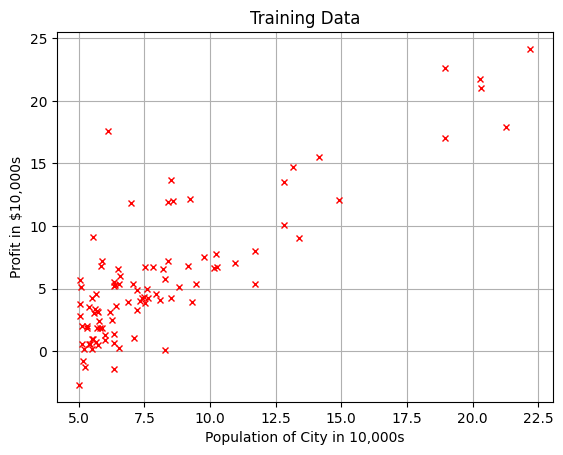


Testando a função de custo...
Com theta = [0 ; 0]
Custo calculado = 32.07
Valor esperado para o custo (aproximadamente): 32.07

Com theta = a]
Custo calculado = 54.24245508201238
Valor esperado para o custo (aproximadamente): 54.24

Executando a descida do gradiente...
Parâmetros theta encontrados pela descida do gradiente:
[-3.0948903  1.1125755]
Valores esperados para theta (aproximadamente):
 -3.6303
  1.1664


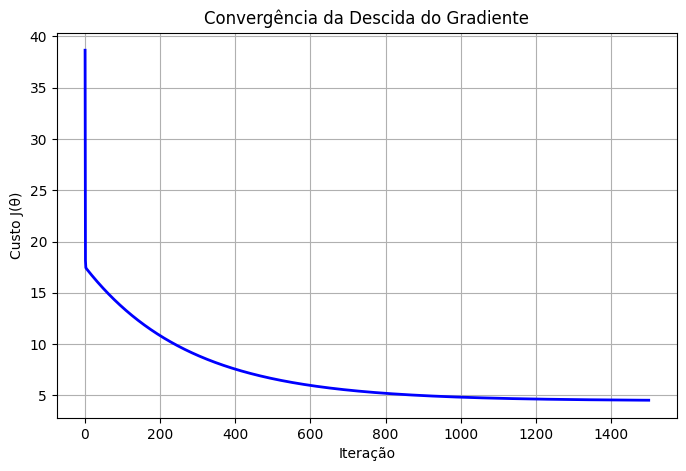

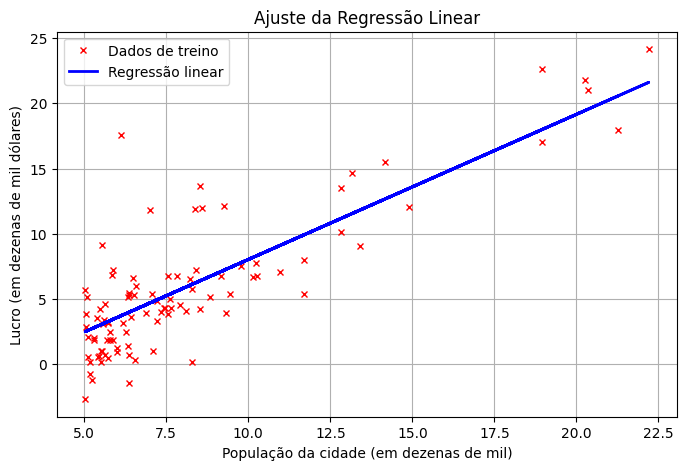


Para população = 35.000, lucro previsto = $7991.24
Para população = 70.000, lucro previsto = $46931.38
Visualizando a função J(theta_0, theta_1) – superfície 3D...


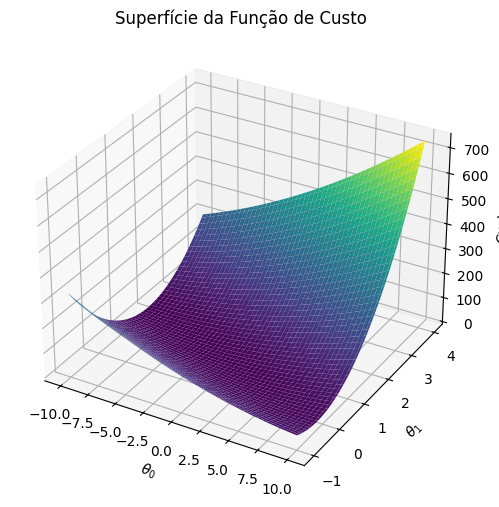

Visualizando a função J(theta_0, theta_1) – contorno...


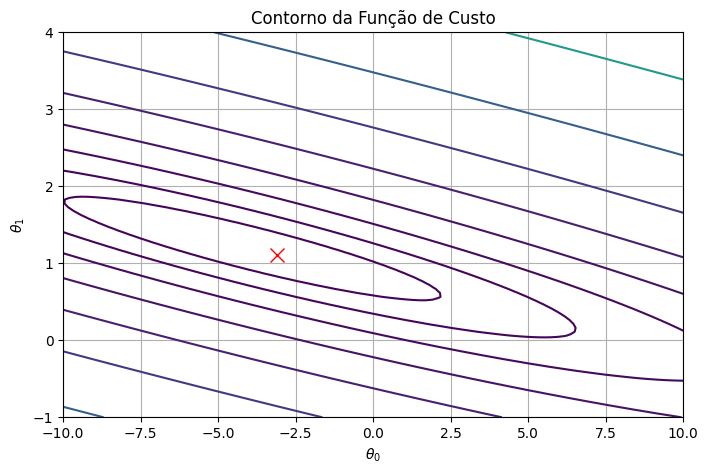

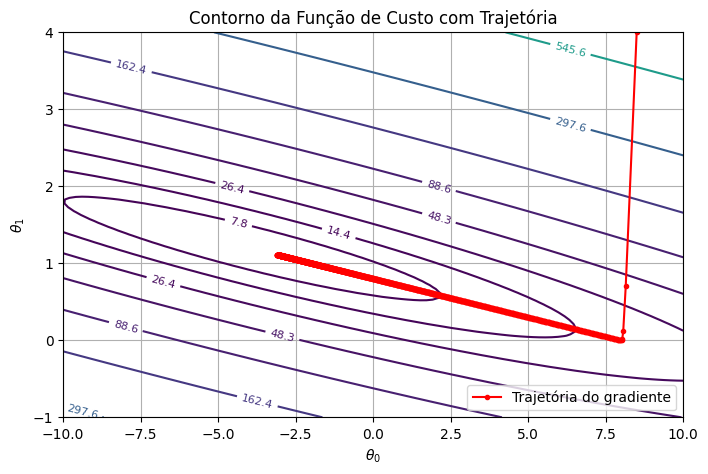

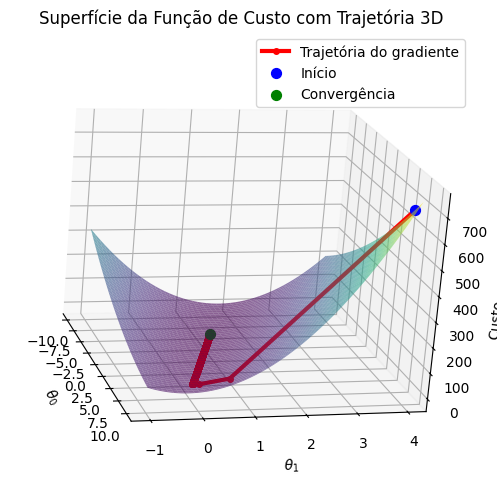

In [5]:
"""
@file regressao-linear-ex1.py
@brief Exercise 2 - Linear Regression implementation with visualization.

This script performs the following tasks:
1. Runs a warm-up exercise.
2. Loads and plots training data.
3. Implements cost function and gradient descent.
4. Predicts values for new inputs.
5. Visualizes the cost function surface and contour.

@author Teacher Thales Levi Azevedo Valente
@subject Foundations of Neural Networks
@course Computer Engineering
@university Federal University of Maranhão
@date 2025
"""


import numpy as np
import matplotlib.pyplot as plt
import os


def main():
    """
    @brief Executa todos os passos do exercício de regressão linear.

    Esta função serve como ponto de partida para o exercício completo de regressão linear.
    Ela executa uma série de etapas fundamentais, utilizadas como base para o aprendizado
    de modelos supervisionados em redes neurais.

    As principais etapas executadas são:
      1. Executa o exercício de aquecimento (warm-up), imprimindo uma matriz identidade 5x5.
      2. Carrega e plota os dados de treinamento de uma regressão linear simples.
      3. Calcula o custo com diferentes valores de theta usando a função de custo J(θ).
      4. Executa o algoritmo de descida do gradiente para minimizar a função de custo.
      5. Plota a linha de regressão ajustada sobre os dados originais.
      6. Realiza previsões para valores populacionais de 35.000 e 70.000.
      7. Visualiza a função de custo J(θ₀, θ₁) em gráfico de superfície 3D e gráfico de contorno.

    @instructions
    - Os alunos devem garantir que todas as funções auxiliares estejam implementadas corretamente:
        * warm_up_exercise()
        * plot_data()
        * compute_cost()
        * gradient_descent()
    - Todas as funções devem seguir padrão PEP8 e possuir docstrings no formato Doxygen.
    - O script deve ser executado a partir do `main()`.

    @note
    O dataset de entrada `ex1data1.txt` deve estar no mesmo diretório Data.
    A estrutura esperada dos dados é: [population, profit].

    @return None
    """

    # Garante que a pasta de figuras existe
    os.makedirs("Figures", exist_ok=True)

    print('Executando o exercício de aquecimento (warm_up_exercise)...')
    print('Matriz identidade 5x5:')
    # Executa a função de aquecimento
    # Essa função deve retornar uma matriz identidade 5x5
    # representada como um array do NumPy.
    # A função está definida em Functions/warm_up_exercise.py
    # e foi importada no início deste arquivo.
    print('Executando os exercícios de aquecimento...')

    # Exercício 1: Matriz identidade 5x5
    print('\nExercício 1: Matriz identidade 5x5')
    print(warm_up_exercise1()) # Esperado: [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]

    # Exercício 2: Vetor coluna de 1s
    print('\nExercício 2: Vetor de 1s (m=3)')
    print(warm_up_exercise2(3)) # Esperado: [[1], [1], [1]]

    # Exercício 3: Adiciona bias ao vetor x
    print('\nExercício 3: Adiciona coluna de 1s ao vetor [2, 4, 6]')
    x_ex3 = np.array([2, 4, 6])
    print(warm_up_exercise3(x_ex3)) # Esperado: [[1, 2], [1, 4], [1, 6]]

    # Exercício 4: Produto matricial X @ theta
    print('\nExercício 4: Produto X @ theta')
    X_ex4 = warm_up_exercise3(x_ex3)
    theta_ex4 = np.array([1, 2])
    print(warm_up_exercise4(X_ex4, theta_ex4))  # Esperado: [5, 9, 13]

    # Exercício 5: Erros quadráticos
    print('\nExercício 5: Erros quadráticos entre predições e y')
    preds = warm_up_exercise4(X_ex4, theta_ex4)
    y_ex5 = np.array([5, 9, 13])
    print(warm_up_exercise5(preds, y_ex5))  # Esperado: [0, 0, 0]

    # Exercício 6: Custo médio a partir dos erros
    print('\nExercício 6: Custo médio')
    errors_ex6 = warm_up_exercise5(preds, y_ex5)
    print(warm_up_exercise6(errors_ex6))  # Esperado: 0.0

    # Exercício 7: Custo médio com base em X, y e theta
    print('\nExercício 7: Cálculo do custo médio completo')
    print(warm_up_exercise7(X_ex4, y_ex5, theta_ex4))  # Esperado: 0.0




    print('Plotando os dados...')
    # Carrega os dados de treinamento a partir do arquivo ex1data1.txt
    # O arquivo contém duas colunas: a primeira com a população da cidade
    # (em dezenas de milhar) e a segunda com o lucro (em dezenas de mil dólares).
    # Os dados são carregados usando a função np.loadtxt do NumPy.
    # A função np.loadtxt lê os dados do arquivo e os armazena em um array NumPy.
    data = np.loadtxt('ex1data1.txt', delimiter=',')
    # Separa os dados em duas variáveis: x e y
    # x contém a população da cidade (em dezenas de milhar)
    # y contém o lucro (em dezenas de mil dólares)
    # A primeira coluna de data é a população (x), a feature
    # que será usada para prever o lucro.
    x = data[:, 0]
    # A segunda coluna de data é o lucro (y), a label ou target
    y = data[:, 1]
    # Agora, obtemos o número de exemplos de treinamento (m)
    m = len(y)

    # Plotagem dos dados
    # Utiliza a função plot_data para exibir os pontos (x, y) em um gráfico 2D.
    # A função está definida em Functions/plot_data.py
    # e foi importada no início do arquivo.
    plot_data(x, y)



    # Preparação dos dados para o algoritmo de descida do gradiente
    # Adiciona uma coluna de 1s à matriz x para representar o termo de interceptação (bias).
    # Isso é feito com np.column_stack, combinando uma coluna de 1s com os valores de x.
    # A nova matriz x_aug terá duas colunas: a primeira com 1s e a segunda com os valores originais de x.
    x_aug = np.column_stack((np.ones(m), x))

    # Inicialização de theta como um vetor nulo (vetor de zeros)
    # Inicializa o vetor de parâmetros theta como um vetor nulo com 2 elementos (theta[0] e theta[1]).
    # O primeiro elemento representa o intercepto (bias) e o segundo o coeficiente angular (inclinação).
    # Esse vetor será ajustado durante a execução do algoritmo de descida do gradiente.
    # theta = np.zeros(2)
    theta = np.array([0, 0])

    # Parâmetros da descida do gradiente
    # Define o número de iterações e a taxa de aprendizado (alpha)
    # O número de iterações determina quantas vezes os parâmetros serão atualizados.
    iterations = 1500

    # A taxa de aprendizado (alpha) controla o tamanho do passo dado em cada iteração do algoritmo de descida do gradiente.
    # Um alpha muito grande pode fazer o algoritmo divergir, enquanto um muito pequeno pode torná-lo lento.
    # Aqui, alpha é definido como 0.01, um valor comumente usado em problemas de regressão linear.
    # Você pode experimentar outros valores para ver como o algoritmo se comporta.
    alpha = 0.01

    print('\nTestando a função de custo...')
    # Utiliza a função compute_cost para calcular o custo com os parâmetros iniciais (theta = [0, 0]).
    # Essa função mede o quão bem os parâmetros atuais se ajustam aos dados de treinamento.
    # Ela está definida em Functions/compute_cost.py e foi importada anteriormente.
    # Os parâmetros de entrada são a matriz x_aug (com 1s e valores de x), o vetor y (lucro) e o vetor theta (parâmetros).
    cost = compute_cost(x_aug, y, theta)
    print(f'Com theta = [0 ; 0]\nCusto calculado = {cost:.2f}')
    print('Valor esperado para o custo (aproximadamente): 32.07')

    # Testando a função de custo com outro valor de theta
    # Aqui, testamos a função de custo com um valor diferente de theta ([-1, 2]).
    # Isso nos permite verificar se a função de custo está funcionando corretamente.
    # O valor de theta = [-1, 2] é um exemplo e não representa o ajuste ideal.
    cost =  compute_cost(x_aug, y, np.array([-1, 2]))
    print(f'\nCom theta = a]\nCusto calculado = {cost}')
    print('Valor esperado para o custo (aproximadamente): 54.24')

    print('\nExecutando a descida do gradiente...')
    # Executa o algoritmo de descida do gradiente para encontrar os parâmetros ótimos (theta).
    # A função gradient_descent é definida em Functions/gradient_descent.py
    # e foi importada anteriormente.
    # Ela recebe como parâmetros a matriz x_aug (com 1s e valores de x), o vetor y (lucro),

    # Após os testes, inicializamos os parâmetros theta com valores diferentes de zero.
    # theta = [8.5, 4.0] é o ponto de partida padrão. Foi estabelecido empiricamente ao olhar os gráficos.
    # Você pode experimentar outros valores para ver como o algoritmo se comporta.
    theta = np.array([8.5, 4.0])
    # o vetor theta, a taxa de aprendizado (alpha) e o número de iterações.
    # A função retorna os parâmetros ajustados (theta), o histórico de custos (J_history) e o histórico de theta (theta_history).
    # O histórico de custos é usado para visualizar a convergência do algoritmo.
    # O histórico de theta é usado para visualizar a trajetória do gradiente na superfície da função de custo.
    theta, J_history, theta_history = gradient_descent(x_aug, y, theta, alpha, iterations)

    print('Parâmetros theta encontrados pela descida do gradiente:')
    print(theta)
    print('Valores esperados para theta (aproximadamente):')
    print(' -3.6303\n  1.1664')

    # 1. Gráfico da convergência da função de custo
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(1, iterations + 1), J_history, 'b-', linewidth=2)
    plt.xlabel('Iteração')
    plt.ylabel('Custo J(θ)')
    plt.title('Convergência da Descida do Gradiente')
    plt.savefig("Figures/convergencia_custo.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/convergencia_custo.svg", format='svg', bbox_inches='tight')
    plt.grid(True)
    plt.show()

    # 2. Gráfico do Ajuste da Regressão Linear
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'rx', markersize=5, label='Dados de treino')
    plt.plot(x, x_aug @ theta, 'b-', linewidth=2, label='Regressão linear')
    plt.xlabel('População da cidade (em dezenas de mil)')
    plt.ylabel('Lucro (em dezenas de mil dólares)')
    plt.title('Ajuste da Regressão Linear')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Previsões usando theta ajustado
    predict1 = np.array([1, 3.5]) @ theta
    predict2 = np.array([1, 7.0]) @ theta
    print(f'\nPara população = 35.000, lucro previsto = ${predict1 * 10000:.2f}')
    print(f'Para população = 70.000, lucro previsto = ${predict2 * 10000:.2f}')


    # 3. Gráfico de superfície 3D da função de custo J(θ₀, θ₁)
    print('Visualizando a função J(theta_0, theta_1) – superfície 3D...')
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    j_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, t0 in enumerate(theta0_vals):
        for j, t1 in enumerate(theta1_vals):
            j_vals[i, j] = compute_cost(x_aug, y, np.array([t0, t1]))
    j_vals = j_vals.T

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    t0_mesh, t1_mesh = np.meshgrid(theta0_vals, theta1_vals)
    ax.plot_surface(t0_mesh, t1_mesh, j_vals, cmap='viridis', edgecolor='none')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel('Custo')
    plt.title('Superfície da Função de Custo')
    plt.show()

    # 4. Gráfico de contorno da função de custo
    print('Visualizando a função J(theta_0, theta_1) – contorno...')
    plt.figure(figsize=(8, 5))
    plt.contour(theta0_vals, theta1_vals, j_vals, levels=np.logspace(-2, 3, 20))
    plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title('Contorno da Função de Custo')
    plt.grid(True)
    plt.show()

    # 5) Contorno da função de custo + trajetória do gradiente
    plt.figure(figsize=(8, 5))
    # desenha as linhas de contorno
    cs = plt.contour(theta0_vals, theta1_vals, j_vals,
                     levels=np.logspace(-2, 3, 20))
    plt.clabel(cs, inline=1, fontsize=8)  # mostra valores de custo nas linhas

    # sobrepõe a trajetória dos thetas
    plt.plot(theta_history[:, 0], theta_history[:, 1],
             'r.-', markersize=6, label='Trajetória do gradiente')

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title('Contorno da Função de Custo com Trajetória')
    plt.legend()
    plt.grid(True)
    plt.savefig("Figures/contorno_trajetoria.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/contorno_trajetoria.svg", format='svg', bbox_inches='tight')
    plt.show()

    # 7) Superfície da função de custo com trajetória 3D melhor visualizada
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # 7.1 Plota a superfície semitransparente
    surf = ax.plot_surface(
        t0_mesh, t1_mesh, j_vals,
        cmap='viridis',
        edgecolor='none',
        alpha=0.6       # deixa a superfície semitransparente
    )

    # 7.2 Ajusta ângulo de visão
    ax.view_init(elev=18, azim=-18, roll=-5)

    # 7.3 Trajetória do gradiente em linha vermelha grossa
    costs = np.concatenate(
        ([compute_cost(x_aug, y, theta_history[0])], J_history)
    )

    # Inserindo a trajetória 3D do gradiente
    # theta_history: shape (iter+1, 2), J_history: shape (iter,)
    ax.plot(
        theta_history[:, 0],
        theta_history[:, 1], costs,
        color='red',
        linewidth=3,
        marker='o',
        markersize=4,
        label='Trajetória do gradiente'
    )

    # 7.4 Destacar ponto inicial e final
    ax.scatter(
        theta_history[0, 0], theta_history[0, 1], costs[0],
        color='blue', s=50, label='Início'
    )
    ax.scatter(
        theta_history[-1, 0], theta_history[-1, 1], costs[-1],
        color='green', s=50, label='Convergência'
    )

    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel('Custo')
    plt.title('Superfície da Função de Custo com Trajetória 3D')
    ax.legend()
    plt.savefig("Figures/superficie_trajetoria.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/superficie_trajetoria.svg", format='svg', bbox_inches='tight')
    plt.show()


if __name__ == '__main__':
    main()


## Compare as trajetórias no gráfico de contorno.
* este três inicializações distintas fixas (ex: [0,0], [5,5], [-5,5]) e 3 inicializações distintas de forma aleatória.

Plotando os dados...


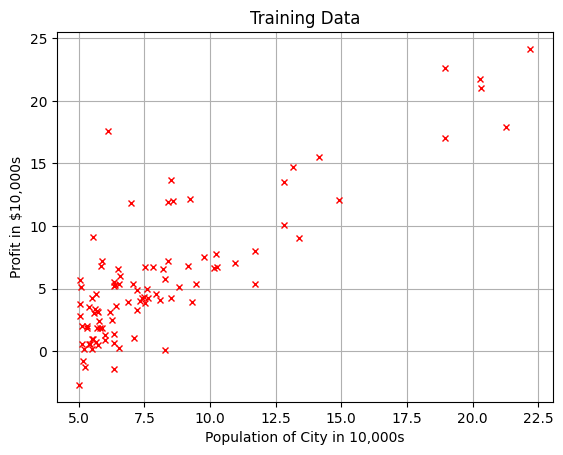


Testando a função de custo...
Com theta = [0 ; 0]
Custo calculado = 32.07
Com theta = [5 ; 5]
Custo calculado = 910.28
Com theta = [-5 ; 5]
Custo calculado = 560.68
Com theta = [-1 ; 2]
Custo calculado = 54.24
Com theta = [-2.5 ; 1.5]
Custo calculado = 12.78
Com theta = [-6 ; 4]
Custo calculado = 279.19

Executando a descida do gradiente...
Parâmetros theta encontrados pela descida do gradiente:
[-3.63029144  1.16636235]
[-3.33293099  1.13648927]
[-3.99407052  1.2029079 ]
[-3.70968912  1.17433871]
[-3.80553912  1.18396788]
[-4.05354261  1.20888252]


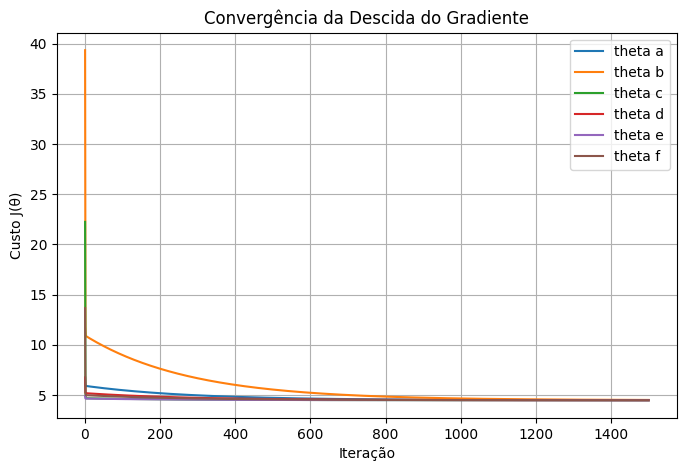

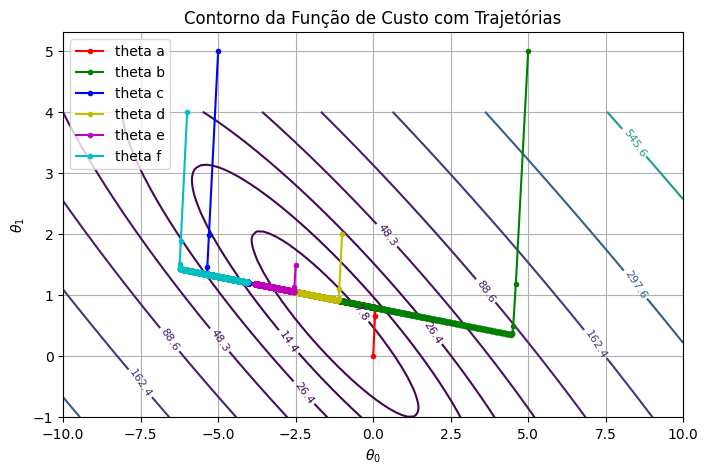

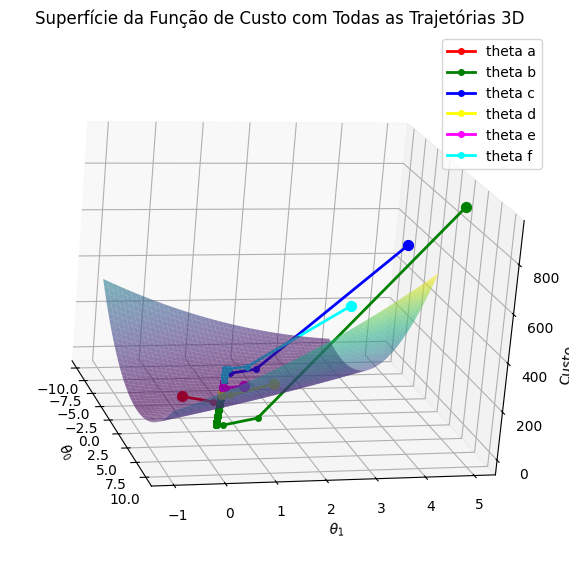

In [6]:
    print('Plotando os dados...')
    data = np.loadtxt('ex1data1.txt', delimiter=',')
    x = data[:, 0]
    y = data[:, 1]
    m = len(y)

    plot_data(x, y)

    x_aug = np.column_stack((np.ones(m), x))

    thetaa = np.array([0, 0])
    thetab = np.array([5, 5])
    thetac = np.array([-5, 5])
    thetad = np.array([-1, 2])
    thetae = np.array([-2.5, 1.5])
    thetaf = np.array([-6, 4])

    iterations = 1500

    alpha = 0.01

    print('\nTestando a função de custo...')
    cost = compute_cost(x_aug, y, thetaa)
    print(f'Com theta = [0 ; 0]\nCusto calculado = {cost:.2f}')

    cost = compute_cost(x_aug, y, thetab)
    print(f'Com theta = [5 ; 5]\nCusto calculado = {cost:.2f}')

    cost = compute_cost(x_aug, y, thetac)
    print(f'Com theta = [-5 ; 5]\nCusto calculado = {cost:.2f}')

    cost = compute_cost(x_aug, y, thetad)
    print(f'Com theta = [-1 ; 2]\nCusto calculado = {cost:.2f}')

    cost = compute_cost(x_aug, y, thetae)
    print(f'Com theta = [-2.5 ; 1.5]\nCusto calculado = {cost:.2f}')

    cost = compute_cost(x_aug, y, thetaf)
    print(f'Com theta = [-6 ; 4]\nCusto calculado = {cost:.2f}')


    print('\nExecutando a descida do gradiente...')
    thetaa, J_historya, theta_historya = gradient_descent(x_aug, y, thetaa, alpha, iterations)
    thetab, J_historyb, theta_historyb = gradient_descent(x_aug, y, thetab, alpha, iterations)
    thetac, J_historyc, theta_historyc = gradient_descent(x_aug, y, thetac, alpha, iterations)
    thetad, J_historyd, theta_historyd = gradient_descent(x_aug, y, thetad, alpha, iterations)
    thetae, J_historye, theta_historye = gradient_descent(x_aug, y, thetae, alpha, iterations)
    thetaf, J_historyf, theta_historyf = gradient_descent(x_aug, y, thetaf, alpha, iterations)

    print('Parâmetros theta encontrados pela descida do gradiente:')
    print(thetaa)
    print(thetab)
    print(thetac)
    print(thetad)
    print(thetae)
    print(thetaf)

    # 1. Gráfico da convergência da função de custo
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(1, iterations + 1), J_historya, label='theta a')
    plt.plot(np.arange(1, iterations + 1), J_historyb, label='theta b')
    plt.plot(np.arange(1, iterations + 1), J_historyc, label='theta c')
    plt.plot(np.arange(1, iterations + 1), J_historyd, label='theta d')
    plt.plot(np.arange(1, iterations + 1), J_historye, label='theta e')
    plt.plot(np.arange(1, iterations + 1), J_historyf, label='theta f')

    plt.xlabel('Iteração')
    plt.ylabel('Custo J(θ)')
    plt.title('Convergência da Descida do Gradiente')
    plt.legend()
    plt.grid(True)
    plt.savefig("Figures/convergencia_custo_todos.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/convergencia_custo_todos.svg", format='svg', bbox_inches='tight')
    plt.show()

    # 5) Contorno da função de custo + trajetória do gradiente
    plt.figure(figsize=(8, 5))

    # Gerando valores para o gráfico de contorno e superfície
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    j_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i in range(len(theta0_vals)):
      for j in range(len(theta1_vals)):
          t = np.array([theta0_vals[i], theta1_vals[j]])
          j_vals[i, j] = compute_cost(x_aug, y, t)

    # Desenha as linhas de contorno
    cs = plt.contour(theta0_vals, theta1_vals, j_vals,
                    levels=np.logspace(-2, 3, 20))
    plt.clabel(cs, inline=1, fontsize=8)

    # Plota todas as trajetórias
    plt.plot(theta_historya[:, 0], theta_historya[:, 1], 'r.-', label='theta a')
    plt.plot(theta_historyb[:, 0], theta_historyb[:, 1], 'g.-', label='theta b')
    plt.plot(theta_historyc[:, 0], theta_historyc[:, 1], 'b.-', label='theta c')
    plt.plot(theta_historyd[:, 0], theta_historyd[:, 1], 'y.-', label='theta d')
    plt.plot(theta_historye[:, 0], theta_historye[:, 1], 'm.-', label='theta e')
    plt.plot(theta_historyf[:, 0], theta_historyf[:, 1], 'c.-', label='theta f')

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title('Contorno da Função de Custo com Trajetórias')
    plt.legend()
    plt.grid(True)
    plt.savefig("Figures/contorno_trajetoria_todos.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/contorno_trajetoria_todos.svg", format='svg', bbox_inches='tight')
    plt.show()

    # 7) Superfície da função de custo com trajetória 3D melhor visualizada
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Meshgrid para o gráfico 3D
    t0_mesh, t1_mesh = np.meshgrid(theta0_vals, theta1_vals)

    # Superfície
    surf = ax.plot_surface(
        t0_mesh, t1_mesh, j_vals,
        cmap='viridis',
        edgecolor='none',
        alpha=0.6
    )

    ax.view_init(elev=18, azim=-18, roll=-5)

    # Função para calcular custos ao longo da trajetória
    def calc_costs(theta_history):
        return np.concatenate(([compute_cost(x_aug, y, theta_history[0])],
                                [compute_cost(x_aug, y, theta) for theta in theta_history[1:]]))

    # Inserindo TODAS as trajetórias
    ax.plot(theta_historya[:, 0], theta_historya[:, 1], calc_costs(theta_historya),
            color='red', marker='o', markersize=4, linewidth=2, label='theta a')

    ax.plot(theta_historyb[:, 0], theta_historyb[:, 1], calc_costs(theta_historyb),
            color='green', marker='o', markersize=4, linewidth=2, label='theta b')

    ax.plot(theta_historyc[:, 0], theta_historyc[:, 1], calc_costs(theta_historyc),
            color='blue', marker='o', markersize=4, linewidth=2, label='theta c')

    ax.plot(theta_historyd[:, 0], theta_historyd[:, 1], calc_costs(theta_historyd),
            color='yellow', marker='o', markersize=4, linewidth=2, label='theta d')

    ax.plot(theta_historye[:, 0], theta_historye[:, 1], calc_costs(theta_historye),
            color='magenta', marker='o', markersize=4, linewidth=2, label='theta e')

    ax.plot(theta_historyf[:, 0], theta_historyf[:, 1], calc_costs(theta_historyf),
            color='cyan', marker='o', markersize=4, linewidth=2, label='theta f')

    # Ponto inicial e final de cada trajetória
    ax.scatter(theta_historya[0, 0], theta_historya[0, 1], calc_costs(theta_historya)[0], color='red', s=50)
    ax.scatter(theta_historyb[0, 0], theta_historyb[0, 1], calc_costs(theta_historyb)[0], color='green', s=50)
    ax.scatter(theta_historyc[0, 0], theta_historyc[0, 1], calc_costs(theta_historyc)[0], color='blue', s=50)
    ax.scatter(theta_historyd[0, 0], theta_historyd[0, 1], calc_costs(theta_historyd)[0], color='yellow', s=50)
    ax.scatter(theta_historye[0, 0], theta_historye[0, 1], calc_costs(theta_historye)[0], color='magenta', s=50)
    ax.scatter(theta_historyf[0, 0], theta_historyf[0, 1], calc_costs(theta_historyf)[0], color='cyan', s=50)

    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel('Custo')
    plt.title('Superfície da Função de Custo com Todas as Trajetórias 3D')
    ax.legend()
    plt.savefig("Figures/superficie_trajetoria_todos.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/superficie_trajetoria_todos.svg", format='svg', bbox_inches='tight')
    plt.show()


##Compare as curvas de convergência em um único gráfico.
* Escolha três valores distintos para α (ex: 0.001, 0.01 e 0.1), sem mudar os outros parâmetros

Plotando os dados...


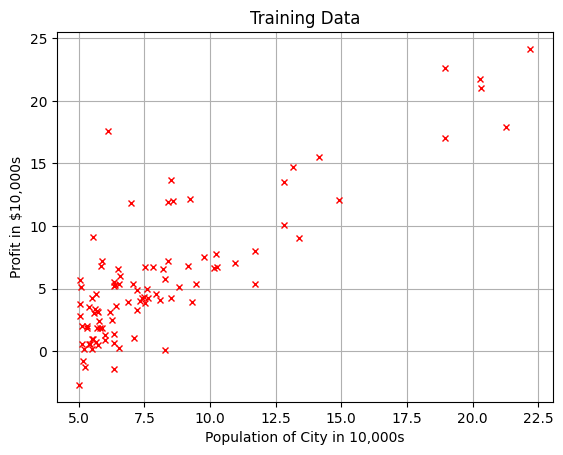


Testando a função de custo...
Com theta = [0 ; 0]
Custo calculado = 32.07

Executando a descida do gradiente...
Ultimo Parâmetros alpha encontrados pela descida do gradiente:
alphaa o primeiro valor de custo 16.769642371667484 e ultimo 4.476999714912219
alphab o primeiro valor de custo 6.737190464870006 e ultimo 4.483388256587725
alphac o primeiro valor de custo 27.94761974682486 e ultimo 5.314765150593782


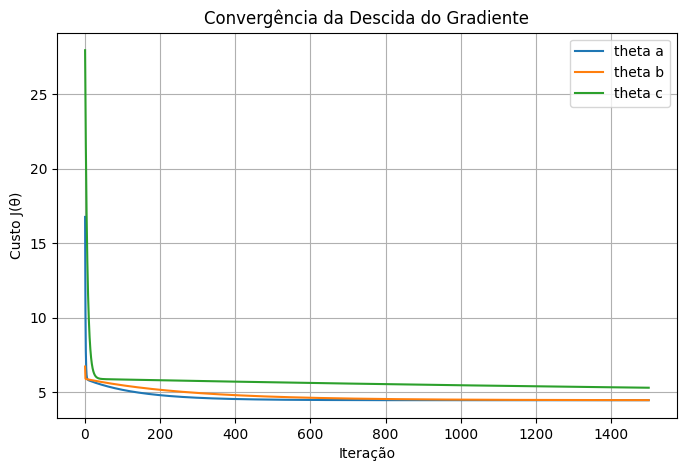

In [19]:
    print('Plotando os dados...')
    data = np.loadtxt('ex1data1.txt', delimiter=',')
    x = data[:, 0]
    y = data[:, 1]
    m = len(y)

    plot_data(x, y)

    x_aug = np.column_stack((np.ones(m), x))

    theta = np.array([0, 0])

    iterations = 1500

    alphaa = 0.02
    alphab = 0.01
    alphac = 0.001

    print('\nTestando a função de custo...')
    cost = compute_cost(x_aug, y, theta)
    print(f'Com theta = [0 ; 0]\nCusto calculado = {cost:.2f}')


    print('\nExecutando a descida do gradiente...')
    thetaa, J_historya, theta_historya = gradient_descent(x_aug, y, theta, alphaa, iterations)
    thetab, J_historyb, theta_historyb = gradient_descent(x_aug, y, theta, alphab, iterations)
    thetac, J_historyc, theta_historyc = gradient_descent(x_aug, y, theta, alphac, iterations)

    print('Ultimo Parâmetros alpha encontrados pela descida do gradiente:')
    print(f'alphaa o primeiro valor de custo {J_historya[0]} e ultimo {J_historya[-1]}')
    print(f'alphab o primeiro valor de custo {J_historyb[0]} e ultimo {J_historyb[-1]}')
    print(f'alphac o primeiro valor de custo {J_historyc[0]} e ultimo {J_historyc[-1]}')

    # 1. Gráfico da convergência da função de custo
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(1, iterations + 1), J_historya, label='theta a')
    plt.plot(np.arange(1, iterations + 1), J_historyb, label='theta b')
    plt.plot(np.arange(1, iterations + 1), J_historyc, label='theta c')


    plt.xlabel('Iteração')
    plt.ylabel('Custo J(θ)')
    plt.title('Convergência da Descida do Gradiente')
    plt.legend()
    plt.grid(True)
    plt.savefig("Figures/convergencia_custo_todos.png", dpi=300, bbox_inches='tight')
    plt.savefig("Figures/convergencia_custo_todos.svg", format='svg', bbox_inches='tight')
    plt.show()